IS6052 Individual Assignment Jupyter Notebook

Submitted by:                                         
Mrithul Madhu Kumar - 124104690   

Submitted to:  
Prof Hadi Karimikia.

Import Libraries.

In [460]:
from operator import index
from statistics import linear_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms.bipartite.basic import color
from sqlalchemy import false
import re
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.regression import linear_model
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Import Dataset

In [244]:
df = pd.read_csv("https://raw.githubusercontent.com/mrithulmadhukumar/predictive_analytics/refs/heads/main/Ireland%20House%20Price%20Final.csv")

In [245]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13320 non-null  int64  
 1   property_scope        13320 non-null  object 
 2   availability          13320 non-null  object 
 3   location              13319 non-null  object 
 4   size                  13304 non-null  object 
 5   total_sqft            13320 non-null  object 
 6   bath                  13247 non-null  float64
 7   balcony               12711 non-null  float64
 8   buying or not buying  13320 non-null  object 
 9   BER                   13320 non-null  object 
 10  Renovation needed     13320 non-null  object 
 11  price-per-sqft-$      13074 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


In [246]:
df.nunique()

ID                      13320
property_scope              4
availability               81
location                    5
size                       30
total_sqft               2117
bath                       19
balcony                     4
buying or not buying        2
BER                         7
Renovation needed           3
price-per-sqft-$         7536
dtype: int64

In [247]:
print(df.columns)

Index(['ID', 'property_scope', 'availability', 'location', 'size',
       'total_sqft', 'bath', 'balcony', 'buying or not buying', 'BER',
       'Renovation needed', 'price-per-sqft-$'],
      dtype='object')


In [248]:
# df[['property_scope','location','balcony', 'buying or not buying', 'BER',
#        'Renovation needed']].value_counts()
print("Unique values in column :",df.property_scope.value_counts())
print("------------------")
print("Unique values in column :",df.location.value_counts())
print("------------------")
print("Unique values in column :",df.balcony.value_counts())
print("------------------")
print("Unique values in column :",df['buying or not buying'].value_counts())
print("------------------")
print("Unique values in column :",df.BER.value_counts())
print("------------------")
print("Unique values in column :",df['Renovation needed'].value_counts())
print("------------------")


Unique values in column : property_scope
Extended Coverage    8790
Constructed Space    2418
Land Parcel          2025
Usable Interior        87
Name: count, dtype: int64
------------------
Unique values in column : location
Fingal           4875
DCC              3030
South Dublin     2610
Dun Laoghaire    2324
Other             480
Name: count, dtype: int64
------------------
Unique values in column : balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64
------------------
Unique values in column : buying or not buying
No     9057
Yes    4263
Name: count, dtype: int64
------------------
Unique values in column : BER
C    1982
B    1955
E    1933
A    1883
F    1864
G    1859
D    1844
Name: count, dtype: int64
------------------
Unique values in column : Renovation needed
Yes      7500
Maybe    3937
No       1883
Name: count, dtype: int64
------------------


Initial EDA

In [249]:
df.describe()

,ID,bath,balcony,price-per-sqft-$
count,13320.000000,13247.000000,12711.000000,1.307400e+04
mean,6659.500000,2.692610,1.584376,1.427913e+03
std,3845.297128,1.341458,0.817263,4.611435e+04
min,0.000000,1.000000,0.000000,3.039868e+01
25%,3329.750000,2.000000,1.000000,4.841873e+02
50%,6659.500000,2.000000,2.000000,6.190909e+02
75%,9989.250000,3.000000,2.000000,8.338172e+02
max,13319.000000,40.000000,3.000000,4.953333e+06


checking to see if there are any duplicate rows.

In [250]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


Data Cleaning and Preparation

In [251]:
df2 = df.copy()#creating a new dataframe

In [252]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13320 non-null  int64  
 1   property_scope        13320 non-null  object 
 2   availability          13320 non-null  object 
 3   location              13319 non-null  object 
 4   size                  13304 non-null  object 
 5   total_sqft            13320 non-null  object 
 6   bath                  13247 non-null  float64
 7   balcony               12711 non-null  float64
 8   buying or not buying  13320 non-null  object 
 9   BER                   13320 non-null  object 
 10  Renovation needed     13320 non-null  object 
 11  price-per-sqft-$      13074 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


function to clean total_sqft column

In [253]:
def convert_to_sqft(value):
    if pd.isna(value):
        return value
    value = str(value).strip()
     # Check for range values and take the average
    if '-' in value:
        values = value.split('-')
        values = [convert_to_sqft(v.strip()) for v in values]
        return sum(values) / len(values)
    # Conversion factors
    conversion_factors = {
        'sq. meter': 10.7639,
        'Sq. Meter' : 10.7639,
        'sq. meters': 10.7639,
        'sq. yard': 9,
        'sq. yards': 9,
        'Sq. Yards' : 9,
        'acre': 43560,
        'acres': 43560,
        'Acres': 43560,
        'perch': 272.25,
        'Perch': 272.25,
        'perches': 272.25,
        'meter': 10.7639,
        'meters': 10.7639,
        'yard': 9,
        'yards': 9,
        'cents' : 435.6,
        'Cents': 435.6,
        'Grounds' : 2400.350017649,
        'grounds' : 2400.350017649,
        'Guntha' : 1089,
        'guntha' : 1089
    }
    
    # Check for units and convert
    for unit, factor in conversion_factors.items():
        if unit in value:
            num = float(re.findall(r'\d+\.?\d*', value)[0])
            return num * factor
    
    # If no unit is found, assume it's already in sqft
    try:
        return float(re.findall(r'\d+\.?\d*', value)[0])
    except (ValueError, IndexError):
        return None

# Apply the conversion function to the total_sqft column
df2['total_sqft'] = df2['total_sqft'].apply(convert_to_sqft)

In [254]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13320 non-null  int64  
 1   property_scope        13320 non-null  object 
 2   availability          13320 non-null  object 
 3   location              13319 non-null  object 
 4   size                  13304 non-null  object 
 5   total_sqft            13320 non-null  float64
 6   bath                  13247 non-null  float64
 7   balcony               12711 non-null  float64
 8   buying or not buying  13320 non-null  object 
 9   BER                   13320 non-null  object 
 10  Renovation needed     13320 non-null  object 
 11  price-per-sqft-$      13074 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


In [255]:
#df2.to_excel("irelandnew.xlsx")

In [256]:
# Function to standardize the size column and convert to float
def standardize_size(value):
    if pd.isna(value):
        return value
    
    value = str(value).strip().lower()
    
    # Extract the number of bedrooms
    match = re.search(r'\d+', value)
    if match:
        num_bedrooms = match.group()
        return float(num_bedrooms)
    return None

# Apply the function to the size column and create a new column bedroom_size
df2['size_by_no_of_bedrooms'] = df2['size'].apply(standardize_size)


In [257]:
#df2.to_excel("irelandnew2.xlsx")

In [258]:
df2.drop(columns='size' , inplace=True)#dropping the column size since not needed anymore

In [259]:
df2.availability.unique()

array(['17-Oct', 'Ready To Move', '18-May', '18-Feb', '19-Dec', '18-Nov',
       '20-Dec', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [260]:
#changing the value 'Immediate Possession' to 'Ready To Move' to decrease the number of unique values in the column availability.
df2.availability = df2.availability.replace('Immediate Possession','Ready To Move')

In [261]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13320 non-null  int64  
 1   property_scope          13320 non-null  object 
 2   availability            13320 non-null  object 
 3   location                13319 non-null  object 
 4   total_sqft              13320 non-null  float64
 5   bath                    13247 non-null  float64
 6   balcony                 12711 non-null  float64
 7   buying or not buying    13320 non-null  object 
 8   BER                     13320 non-null  object 
 9   Renovation needed       13320 non-null  object 
 10  price-per-sqft-$        13074 non-null  float64
 11  size_by_no_of_bedrooms  13304 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.2+ MB


In [262]:
print(df2.columns)

Index(['ID', 'property_scope', 'availability', 'location', 'total_sqft',
       'bath', 'balcony', 'buying or not buying', 'BER', 'Renovation needed',
       'price-per-sqft-$', 'size_by_no_of_bedrooms'],
      dtype='object')


In [263]:
columns_to_round = ['total_sqft', 'size_by_no_of_bedrooms', 'bath', 'balcony', 'price-per-sqft-$']

# Round the specified columns to 2 decimal places
df2[columns_to_round] = df2[columns_to_round].round(2)


print(df2[columns_to_round].head())

   total_sqft  size_by_no_of_bedrooms  bath  balcony  price-per-sqft-$
0      1056.0                     2.0   2.0      1.0            419.93
1      2600.0                     4.0   5.0      3.0            523.85
2      1440.0                     3.0   2.0      3.0            488.68
3      1521.0                     3.0   3.0      1.0            708.91
4      1200.0                     2.0   2.0      1.0            482.38


In [264]:
df2.describe().round(2)

,ID,total_sqft,bath,balcony,price-per-sqft-$,size_by_no_of_bedrooms
count,13320.00,13320.00,13247.00,12711.00,13074.00,13304.00
mean,6659.50,1911.60,2.69,1.58,1427.91,2.80
std,3845.30,17276.90,1.34,0.82,46114.35,1.29
min,0.00,1.00,1.00,0.00,30.40,1.00
25%,3329.75,1100.00,2.00,1.00,484.19,2.00
50%,6659.50,1277.25,2.00,2.00,619.09,3.00
75%,9989.25,1680.00,3.00,2.00,833.82,3.00
max,13319.00,1306800.00,40.00,3.00,4953333.27,43.00


In [265]:
#df.info()

In [266]:
df2.isnull().sum()

ID                          0
property_scope              0
availability                0
location                    1
total_sqft                  0
bath                       73
balcony                   609
buying or not buying        0
BER                         0
Renovation needed           0
price-per-sqft-$          246
size_by_no_of_bedrooms     16
dtype: int64

In [267]:
# print("bal mean",df2.balcony.mean())
# print("bal median",df2.balcony.median())
# print("bal mode",df2.balcony.mode())

Handling missing values

In [268]:
#filling size column with median values for missing data
df2['size_by_no_of_bedrooms'] = df2['size_by_no_of_bedrooms'].fillna(df2['size_by_no_of_bedrooms'].median())
df2['price-per-sqft-$'] = df2['price-per-sqft-$'].fillna(df2['price-per-sqft-$'].median()).round(2)
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].median())#since median and mode is the same

In [269]:
#Filling missing value with mode for categorical data
imputer = SimpleImputer(strategy='most_frequent')
df2['bath'] = imputer.fit_transform(df2[['bath']])

In [270]:
#dropping row where location is unknown
df2 = df2.dropna(subset=['location'])

In [271]:
#creating a new column total_price which is the product of total_sqft and price_per_sqft
df2['total_price'] = df2['total_sqft'] * df2['price-per-sqft-$'].round(2)

In [272]:
#checking for null values
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13319 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13319 non-null  int64  
 1   property_scope          13319 non-null  object 
 2   availability            13319 non-null  object 
 3   location                13319 non-null  object 
 4   total_sqft              13319 non-null  float64
 5   bath                    13319 non-null  float64
 6   balcony                 13319 non-null  float64
 7   buying or not buying    13319 non-null  object 
 8   BER                     13319 non-null  object 
 9   Renovation needed       13319 non-null  object 
 10  price-per-sqft-$        13319 non-null  float64
 11  size_by_no_of_bedrooms  13319 non-null  float64
 12  total_price             13319 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.4+ MB


EDA

In [273]:
df2.describe().round(2)

,ID,total_sqft,bath,balcony,price-per-sqft-$,size_by_no_of_bedrooms,total_price
count,13319.00,13319.00,13319.00,13319.0,13319.00,13319.00,1.331900e+04
mean,6659.96,1911.62,2.69,1.6,1413.04,2.80,2.133389e+06
std,3845.08,17277.55,1.34,0.8,45688.35,1.29,5.124609e+07
min,0.00,1.00,1.00,0.0,30.40,1.00,9.080048e+04
25%,3330.50,1100.00,2.00,1.0,486.43,2.00,5.674993e+05
50%,6660.00,1277.00,2.00,2.0,619.09,3.00,8.172000e+05
75%,9989.50,1680.00,3.00,2.0,826.54,3.00,1.362002e+06
max,13319.00,1306800.00,40.00,3.0,4953333.27,43.00,5.448667e+09


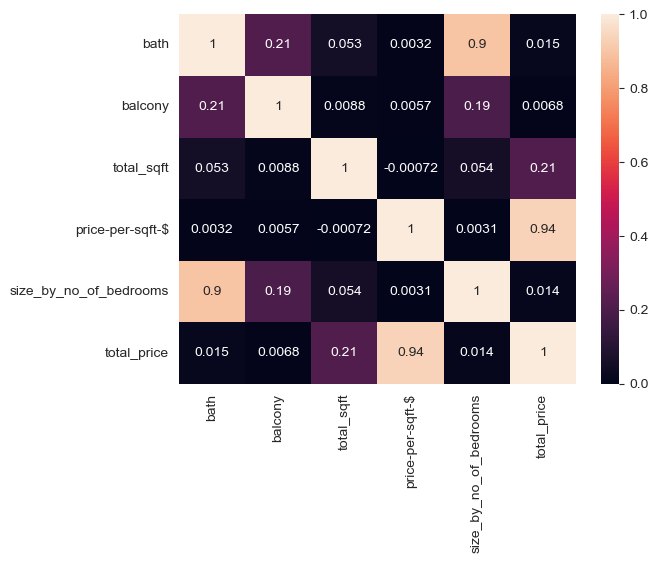

In [274]:
sns.heatmap(df2[['bath','balcony','total_sqft','price-per-sqft-$', 'size_by_no_of_bedrooms','total_price']].corr(), annot=True)
plt.show()

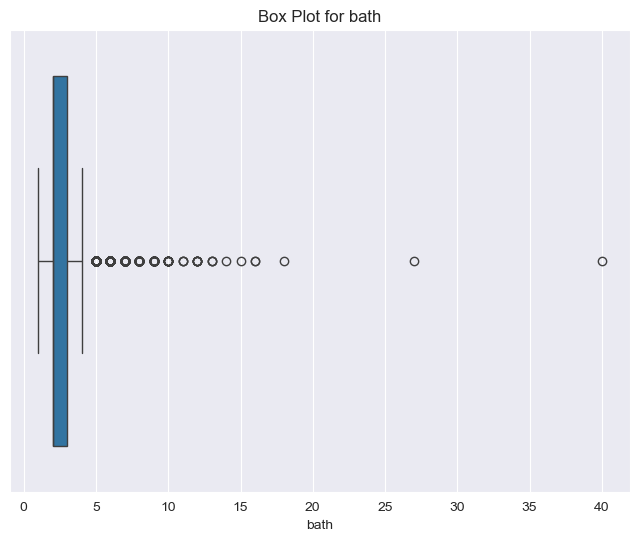

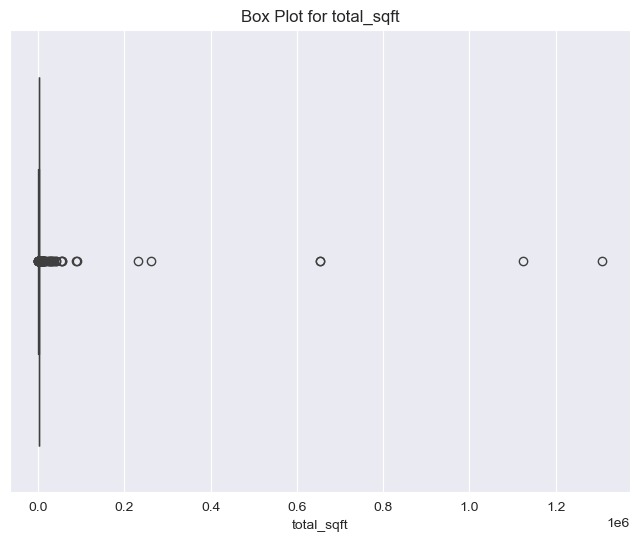

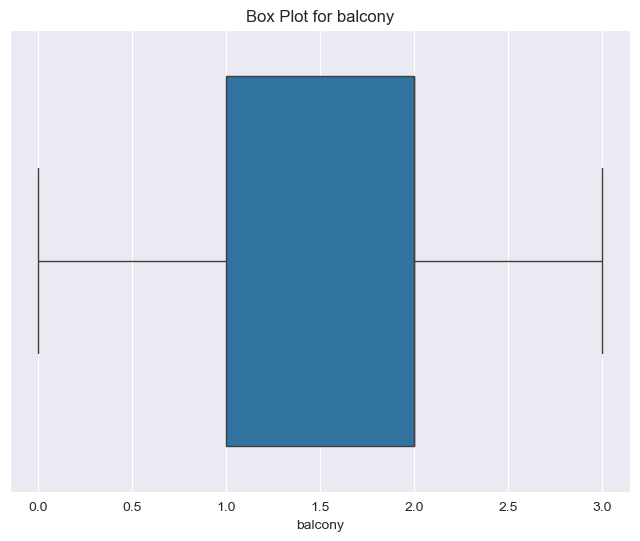

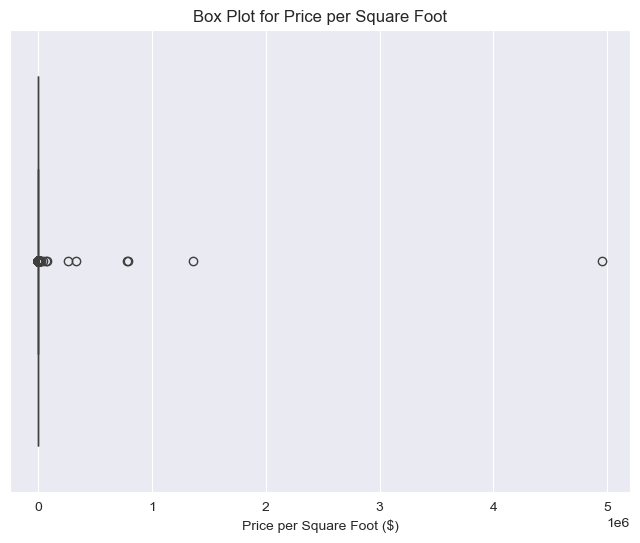

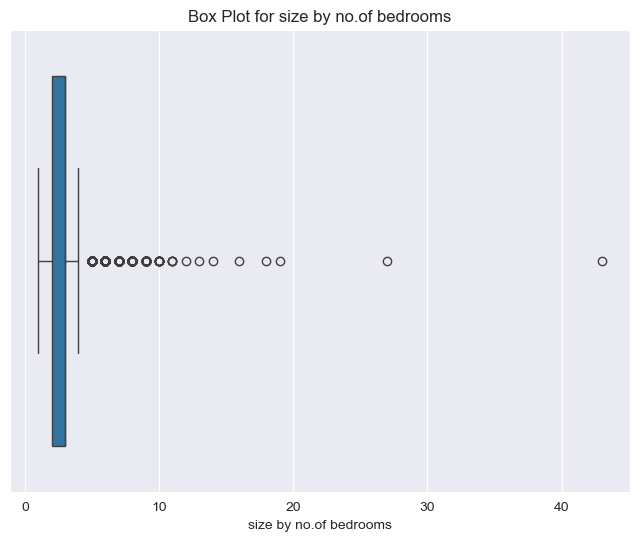

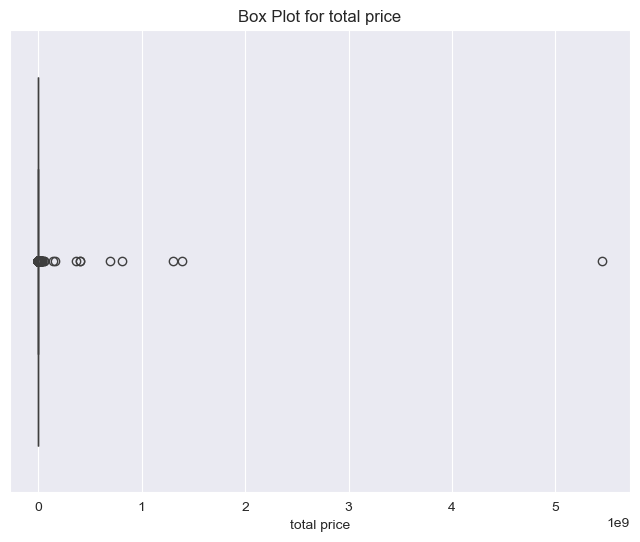

In [275]:

#boxplot for bath
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['bath'])
plt.title('Box Plot for bath')
plt.xlabel('bath')
plt.show()
print('\n')

# box plot, 'total_sqft'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['total_sqft'])
plt.title('Box Plot for total_sqft')
plt.xlabel('total_sqft')
plt.show()
print('\n')

# box plot, 'balcony'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['balcony'])
plt.title('Box Plot for balcony')
plt.xlabel('balcony')
plt.show()
print('\n')
# box plot, 'price-per-sqft-$'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['price-per-sqft-$'])
plt.title('Box Plot for Price per Square Foot')
plt.xlabel('Price per Square Foot ($)')
plt.show()
print('\n')

# box plot,'size by no of bedrooms'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['size_by_no_of_bedrooms'])
plt.title('Box Plot for size by no.of bedrooms')
plt.xlabel('size by no.of bedrooms')
plt.show()
print('\n')

# box plot, 'total_price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['total_price'])
plt.title('Box Plot for total price')
plt.xlabel('total price')
plt.show()




In [366]:
#checking for outliers
Q1_total_sqft = df2['total_sqft'].quantile(0.25)
Q3_total_sqft = df2['total_sqft'].quantile(0.75)
IQR_total_sqft = Q3_total_sqft - Q1_total_sqft
lower_bound_total_sqft = Q1_total_sqft - 1.5 * IQR_total_sqft
upper_bound_total_sqft = Q3_total_sqft + 1.5 * IQR_total_sqft
print('lower_bound_total_sqft :', lower_bound_total_sqft)
print('upper_bound_total_sqft :', upper_bound_total_sqft)

Q1_bath = df2['bath'].quantile(0.25)
Q3_bath = df2['bath'].quantile(0.75)
IQR_bath = Q3_bath - Q1_bath
lower_bound_bath = Q1_bath - 1.5 * IQR_bath
upper_bound_bath = Q3_bath + 1.5 * IQR_bath
print('lower_bound_bath :', lower_bound_bath)
print('upper_bound_bath :', upper_bound_bath)

Q1_size = df2['size_by_no_of_bedrooms'].quantile(0.25)
Q3_size = df2['size_by_no_of_bedrooms'].quantile(0.75)
IQR_size = Q3_size - Q1_size
lower_bound_size = Q1_size - 1.5 * IQR_size
upper_bound_size = Q3_size + 1.5 * IQR_size
print('lower_bound_size :', lower_bound_size)
print('upper_bound_size :', upper_bound_size)

Q1_price = df2['price-per-sqft-$'].quantile(0.25)
Q3_price = df2['price-per-sqft-$'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
print('lower_bound_price_per_sqft :', lower_bound_price)
print('upper_bound_price_per_sqft :', upper_bound_price)

Q1_price = df2['total_price'].quantile(0.25)
Q3_price = df2['total_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_total_price = Q1_price - 1.5 * IQR_price
upper_bound_total_price = Q3_price + 1.5 * IQR_price
print('lower_bound_total_price :', lower_bound_total_price)
print('upper_bound_total_price :', upper_bound_total_price)


lower_bound_total_sqft : 230.0
upper_bound_total_sqft : 2550.0
lower_bound_bath : 0.5
upper_bound_bath : 4.5
lower_bound_size : 0.5
upper_bound_size : 4.5
lower_bound_price_per_sqft : -23.727500000000134
upper_bound_price_per_sqft : 1336.6925
lower_bound_total_price : -624254.0249999999
upper_bound_total_price : 2553754.815


In [277]:
df2[(df2.total_sqft < lower_bound_total_sqft)| (df2.total_sqft > upper_bound_total_sqft)]


,ID,property_scope,availability,location,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,size_by_no_of_bedrooms,total_price
1,1,Land Parcel,Ready To Move,South Dublin,2600.0,5.0,3.0,No,D,Yes,523.85,4.0,1362010.00
6,6,Extended Coverage,18-May,Fingal,2732.0,4.0,2.0,No,A,No,847.51,4.0,2315397.32
7,7,Extended Coverage,Ready To Move,Fingal,3300.0,4.0,2.0,No,F,Yes,2063.64,4.0,6810012.00
11,11,Land Parcel,Ready To Move,Dun Laoghaire,2785.0,5.0,3.0,Yes,B,Maybe,1202.24,4.0,3348238.40
18,18,Extended Coverage,Ready To Move,Fingal,2770.0,4.0,2.0,No,C,Maybe,1188.27,3.0,3291507.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13290,13290,Extended Coverage,Ready To Move,Dun Laoghaire,4050.0,2.0,1.0,Yes,C,Maybe,1261.11,4.0,5107495.50
13299,13299,Extended Coverage,18-Dec,Dun Laoghaire,2856.0,5.0,0.0,Yes,B,Maybe,619.09,4.0,1768121.04
13315,13315,Constructed Space,Ready To Move,Dun Laoghaire,3453.0,4.0,0.0,Yes,B,Maybe,759.30,5.0,2621862.90
13316,13316,Extended Coverage,Ready To Move,Fingal,3600.0,5.0,2.0,No,A,No,1261.11,4.0,4539996.00


In [278]:
df2[(df2.bath < lower_bound_bath)| (df2.bath > upper_bound_bath)]

,ID,property_scope,availability,location,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,size_by_no_of_bedrooms,total_price
1,1,Land Parcel,Ready To Move,South Dublin,2600.0,5.0,3.0,No,D,Yes,523.85,4.0,1362010.00
9,9,Land Parcel,Ready To Move,Fingal,1020.0,6.0,2.0,Yes,C,Maybe,4117.16,6.0,4199503.20
11,11,Land Parcel,Ready To Move,Dun Laoghaire,2785.0,5.0,3.0,Yes,B,Maybe,1202.24,4.0,3348238.40
22,22,Land Parcel,Ready To Move,Dun Laoghaire,2800.0,5.0,2.0,No,D,Yes,1540.36,4.0,4313008.00
45,45,Land Parcel,Ready To Move,DCC,600.0,9.0,2.0,No,G,Yes,3783.33,8.0,2269998.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13300,13300,Land Parcel,Ready To Move,Fingal,1500.0,6.0,2.0,No,E,Yes,1097.17,5.0,1645755.00
13303,13303,Land Parcel,Ready To Move,Fingal,774.0,5.0,3.0,No,A,No,1026.49,5.0,794503.26
13306,13306,Land Parcel,Ready To Move,Fingal,1200.0,5.0,2.0,No,E,Yes,3073.96,4.0,3688752.00
13311,13311,Land Parcel,Ready To Move,DCC,1500.0,9.0,2.0,Yes,F,Yes,1891.67,7.0,2837505.00


In [279]:
df2[(df2.size_by_no_of_bedrooms < lower_bound_size) | (df2.size_by_no_of_bedrooms > upper_bound_size)]


,ID,property_scope,availability,location,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,size_by_no_of_bedrooms,total_price
9,9,Land Parcel,Ready To Move,Fingal,1020.0,6.0,2.0,Yes,C,Maybe,4117.16,6.0,4199503.20
45,45,Land Parcel,Ready To Move,DCC,600.0,9.0,2.0,No,G,Yes,3783.33,8.0,2269998.00
58,58,Land Parcel,Ready To Move,South Dublin,1407.0,4.0,1.0,No,G,Yes,1210.02,6.0,1702498.14
64,64,Constructed Space,Ready To Move,Fingal,3000.0,8.0,0.0,Yes,F,Yes,529.67,8.0,1589010.00
68,68,Land Parcel,Ready To Move,Fingal,1350.0,7.0,0.0,No,G,Yes,714.63,8.0,964750.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13281,13281,Land Parcel,Ready To Move,South Dublin,1375.0,5.0,1.0,No,B,Maybe,1031.82,5.0,1418752.50
13300,13300,Land Parcel,Ready To Move,Fingal,1500.0,6.0,2.0,No,E,Yes,1097.17,5.0,1645755.00
13303,13303,Land Parcel,Ready To Move,Fingal,774.0,5.0,3.0,No,A,No,1026.49,5.0,794503.26
13311,13311,Land Parcel,Ready To Move,DCC,1500.0,9.0,2.0,Yes,F,Yes,1891.67,7.0,2837505.00


In [280]:
df2[(df2['price-per-sqft-$'] < lower_bound_price) | (df2['price-per-sqft-$'] > upper_bound_price)]

,ID,property_scope,availability,location,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,size_by_no_of_bedrooms,total_price
7,7,Extended Coverage,Ready To Move,Fingal,3300.0,4.0,2.0,No,F,Yes,2063.64,4.0,6.810012e+06
9,9,Land Parcel,Ready To Move,Fingal,1020.0,6.0,2.0,Yes,C,Maybe,4117.16,6.0,4.199503e+06
13,13,Constructed Space,Ready To Move,DCC,1100.0,2.0,2.0,No,F,Yes,11412.73,2.0,1.255400e+07
19,19,Extended Coverage,Ready To Move,Fingal,1100.0,2.0,2.0,Yes,F,Yes,4953333.27,2.0,5.448667e+09
22,22,Land Parcel,Ready To Move,Dun Laoghaire,2800.0,5.0,2.0,No,D,Yes,1540.36,4.0,4.313008e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13262,13262,Constructed Space,Ready To Move,Other,1140.0,1.0,1.0,No,D,Yes,1841.89,2.0,2.099755e+06
13277,13277,Land Parcel,Ready To Move,Fingal,1400.0,7.0,2.0,Yes,F,Yes,1767.36,7.0,2.474304e+06
13305,13305,Usable Interior,Ready To Move,DCC,500.0,1.0,3.0,No,E,Yes,4994.00,1.0,2.497000e+06
13306,13306,Land Parcel,Ready To Move,Fingal,1200.0,5.0,2.0,No,E,Yes,3073.96,4.0,3.688752e+06


In [281]:
df2[(df2.total_price < lower_bound_total_price)| (df2.total_price > upper_bound_total_price)]

,ID,property_scope,availability,location,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,size_by_no_of_bedrooms,total_price
7,7,Extended Coverage,Ready To Move,Fingal,3300.0,4.0,2.0,No,F,Yes,2063.64,4.0,6810012.00
9,9,Land Parcel,Ready To Move,Fingal,1020.0,6.0,2.0,Yes,C,Maybe,4117.16,6.0,4199503.20
11,11,Land Parcel,Ready To Move,Dun Laoghaire,2785.0,5.0,3.0,Yes,B,Maybe,1202.24,4.0,3348238.40
13,13,Constructed Space,Ready To Move,DCC,1100.0,2.0,2.0,No,F,Yes,11412.73,2.0,12554003.00
18,18,Extended Coverage,Ready To Move,Fingal,2770.0,4.0,2.0,No,C,Maybe,1188.27,3.0,3291507.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13306,13306,Land Parcel,Ready To Move,Fingal,1200.0,5.0,2.0,No,E,Yes,3073.96,4.0,3688752.00
13311,13311,Land Parcel,Ready To Move,DCC,1500.0,9.0,2.0,Yes,F,Yes,1891.67,7.0,2837505.00
13315,13315,Constructed Space,Ready To Move,Dun Laoghaire,3453.0,4.0,0.0,Yes,B,Maybe,759.30,5.0,2621862.90
13316,13316,Extended Coverage,Ready To Move,Fingal,3600.0,5.0,2.0,No,A,No,1261.11,4.0,4539996.00


using percentile 90/10

In [282]:
#checking for outliers
# Q1_total_sqft = df2['total_sqft'].quantile(0.10)
# Q3_total_sqft = df2['total_sqft'].quantile(0.90)
# IQR_total_sqft = Q3_total_sqft - Q1_total_sqft
# lower_bound_total_sqft = Q1_total_sqft - 1.5 * IQR_total_sqft
# upper_bound_total_sqft = Q3_total_sqft + 1.5 * IQR_total_sqft
# print('lower_bound_total_sqft :', lower_bound_total_sqft)
# print('upper_bound_total_sqft :', upper_bound_total_sqft)
# 
# Q1_bath = df2['bath'].quantile(0.10)
# Q3_bath = df2['bath'].quantile(0.90)
# IQR_bath = Q3_bath - Q1_bath
# lower_bound_bath = Q1_bath - 1.5 * IQR_bath
# upper_bound_bath = Q3_bath + 1.5 * IQR_bath
# print('lower_bound_bath :', lower_bound_bath)
# print('upper_bound_bath :', upper_bound_bath)
# 
# Q1_size = df2['size_by_no_of_bedrooms'].quantile(0.10)
# Q3_size = df2['size_by_no_of_bedrooms'].quantile(0.90)
# IQR_size = Q3_size - Q1_size
# lower_bound_size = Q1_size - 1.5 * IQR_size
# upper_bound_size = Q3_size + 1.5 * IQR_size
# print('lower_bound_size :', lower_bound_size)
# print('upper_bound_size :', upper_bound_size)
# 
# Q1_price = df2['price-per-sqft-$'].quantile(0.10)
# Q3_price = df2['price-per-sqft-$'].quantile(0.90)
# IQR_price = Q3_price - Q1_price
# lower_bound_price = Q1_price - 1.5 * IQR_price
# upper_bound_price = Q3_price + 1.5 * IQR_price
# print('lower_bound_price :', lower_bound_price)
# print('upper_bound_price :', upper_bound_price)

In [283]:
print('lower_bound_price :', lower_bound_price)
print('upper_bound_price :', upper_bound_price)
print('lower_bound_size :', lower_bound_size)
print('upper_bound_size :', upper_bound_size)
print('lower_bound_bath :', lower_bound_bath)
print('upper_bound_bath :', upper_bound_bath)
print('lower_bound_total_sqft :', lower_bound_total_sqft)
print('upper_bound_total_sqft :', upper_bound_total_sqft)
print('lower_bound_price :', lower_bound_total_price)
print('upper_bound_price :', upper_bound_total_price)

lower_bound_price : -23.727500000000134
upper_bound_price : 1336.6925
lower_bound_size : 0.5
upper_bound_size : 4.5
lower_bound_bath : 0.5
upper_bound_bath : 4.5
lower_bound_total_sqft : 230.0
upper_bound_total_sqft : 2550.0
lower_bound_price : -624254.0249999999
upper_bound_price : 2553754.815


In [284]:
#capping outliers to upper or lower limit values
new_df = df2.copy()
new_df.loc[(new_df['total_sqft']>upper_bound_total_sqft),'total_sqft'] = upper_bound_total_sqft
new_df.loc[(new_df['total_sqft']<lower_bound_total_sqft),'total_sqft'] = lower_bound_total_sqft
new_df.loc[(new_df['bath']>upper_bound_bath),'bath'] = upper_bound_bath
new_df.loc[(new_df['bath']<lower_bound_bath),'bath'] = lower_bound_bath
new_df.loc[(new_df['size_by_no_of_bedrooms']>upper_bound_size),'size_by_no_of_bedrooms'] = upper_bound_size
new_df.loc[(new_df['size_by_no_of_bedrooms']<lower_bound_size),'size_by_no_of_bedrooms'] = lower_bound_size
new_df.loc[(new_df['price-per-sqft-$']>upper_bound_price),'price-per-sqft-$'] = upper_bound_price
new_df.loc[(new_df['price-per-sqft-$']<lower_bound_price),'price-per-sqft-$'] = lower_bound_price
new_df.loc[(new_df.total_price < lower_bound_total_price),'total_price'] = lower_bound_total_price
new_df.loc[(new_df.total_price > upper_bound_total_price),'total_price'] = upper_bound_total_price


In [367]:
new_df[['total_sqft','bath','price-per-sqft-$','size_by_no_of_bedrooms','total_price']].describe().round(2)

,total_sqft,bath,price-per-sqft-$,size_by_no_of_bedrooms,total_price
count,13319.00,13319.00,13319.00,13319.00,13319.00
mean,1431.79,2.57,700.44,2.69,1061747.64
std,528.90,0.92,294.57,0.87,677512.39
min,230.00,1.00,30.40,1.00,90800.48
25%,1100.00,2.00,486.43,2.00,567499.29
50%,1277.00,2.00,619.09,3.00,817200.00
75%,1680.00,3.00,826.54,3.00,1362001.50
max,2550.00,4.50,1336.69,4.50,2553754.82


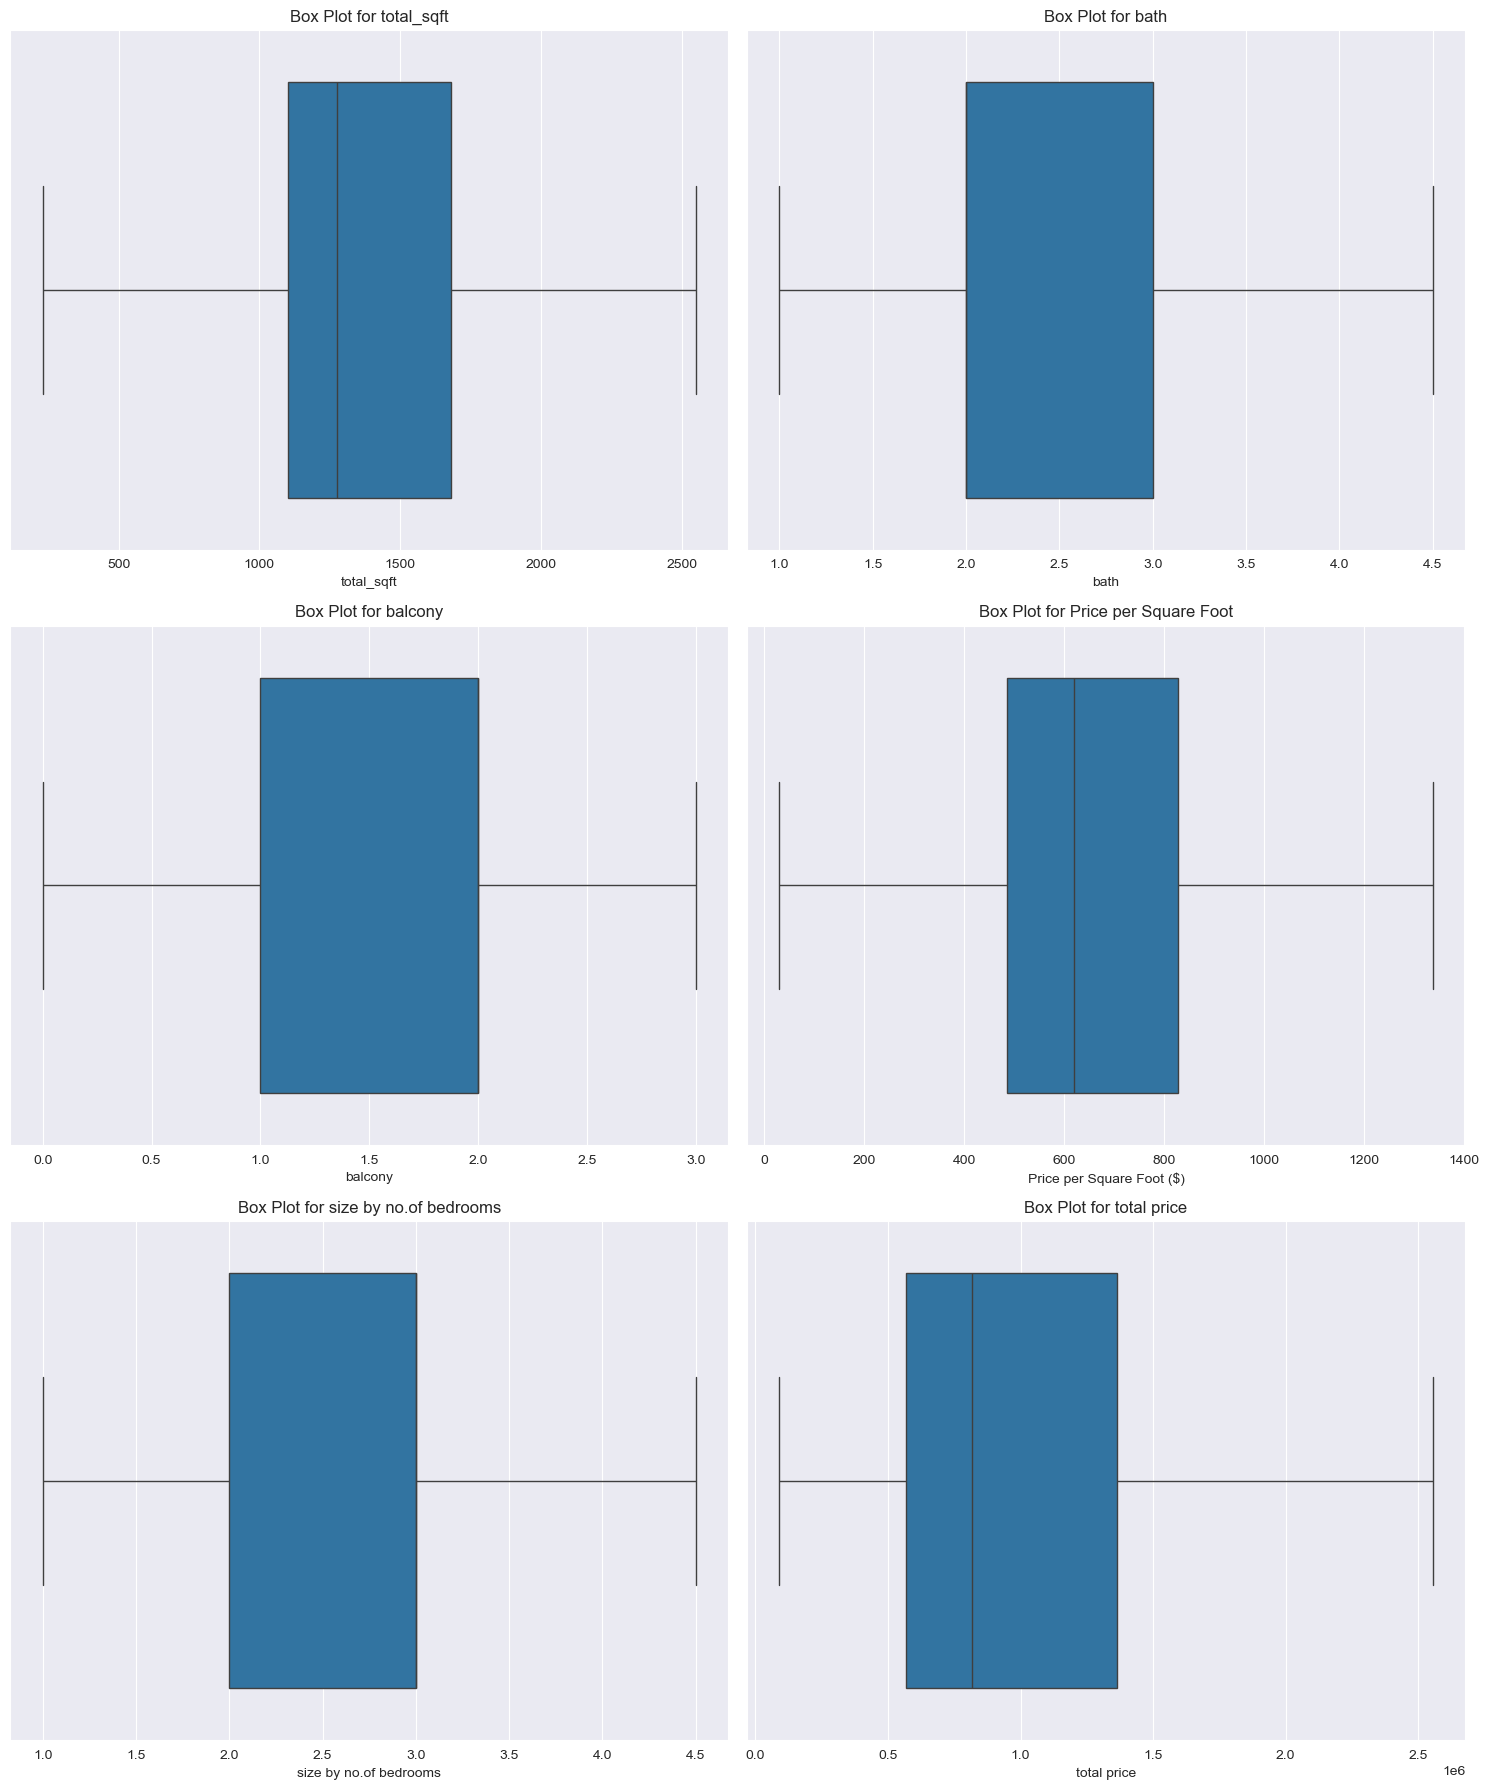

In [369]:
# Plotting after outlier handling
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Box plot for 'total_sqft'
sns.boxplot(x=new_df['total_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot for total_sqft')
axes[0, 0].set_xlabel('total_sqft')

# Box plot for 'bath'
sns.boxplot(x=new_df['bath'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot for bath')
axes[0, 1].set_xlabel('bath')

# Box plot for 'balcony'
sns.boxplot(x=new_df['balcony'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot for balcony')
axes[1, 0].set_xlabel('balcony')

# Box plot for 'price-per-sqft-$'
sns.boxplot(x=new_df['price-per-sqft-$'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot for Price per Square Foot')
axes[1, 1].set_xlabel('Price per Square Foot ($)')

# Box plot for 'size by no of bedrooms'
sns.boxplot(x=new_df['size_by_no_of_bedrooms'], ax=axes[2, 0])
axes[2, 0].set_title('Box Plot for size by no.of bedrooms')
axes[2, 0].set_xlabel('size by no.of bedrooms')

# Box plot for 'total_price'
sns.boxplot(x=new_df['total_price'], ax=axes[2, 1])
axes[2, 1].set_title('Box Plot for total price')
axes[2, 1].set_xlabel('total price')

# Adjust layout
plt.tight_layout()
plt.show()

In [287]:
new_df.isnull().sum()

ID                        0
property_scope            0
availability              0
location                  0
total_sqft                0
bath                      0
balcony                   0
buying or not buying      0
BER                       0
Renovation needed         0
price-per-sqft-$          0
size_by_no_of_bedrooms    0
total_price               0
dtype: int64

In [288]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13319 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13319 non-null  int64  
 1   property_scope          13319 non-null  object 
 2   availability            13319 non-null  object 
 3   location                13319 non-null  object 
 4   total_sqft              13319 non-null  float64
 5   bath                    13319 non-null  float64
 6   balcony                 13319 non-null  float64
 7   buying or not buying    13319 non-null  object 
 8   BER                     13319 non-null  object 
 9   Renovation needed       13319 non-null  object 
 10  price-per-sqft-$        13319 non-null  float64
 11  size_by_no_of_bedrooms  13319 non-null  float64
 12  total_price             13319 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.4+ MB


In [289]:
new_df.reset_index(drop=True, inplace=True)

In [290]:
#new_df.to_excel('cleaned_dataset.xlsx')

Predictive Analytics

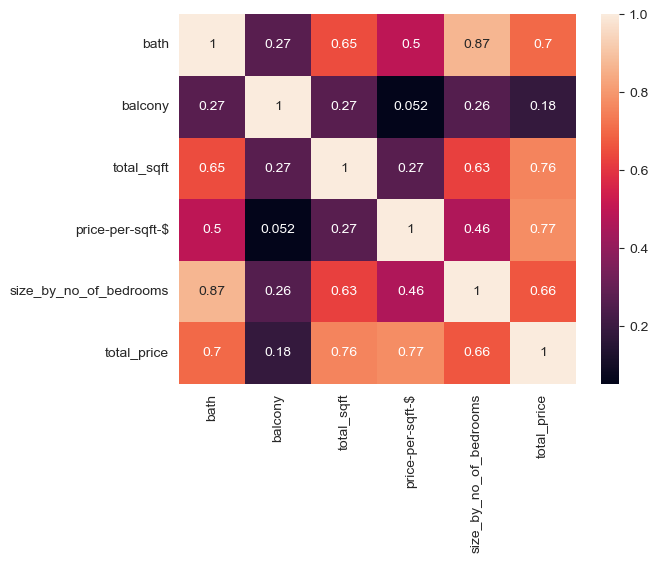

In [291]:
sns.heatmap(new_df[['bath','balcony','total_sqft','price-per-sqft-$', 'size_by_no_of_bedrooms','total_price']].corr(), annot=True)
plt.show()


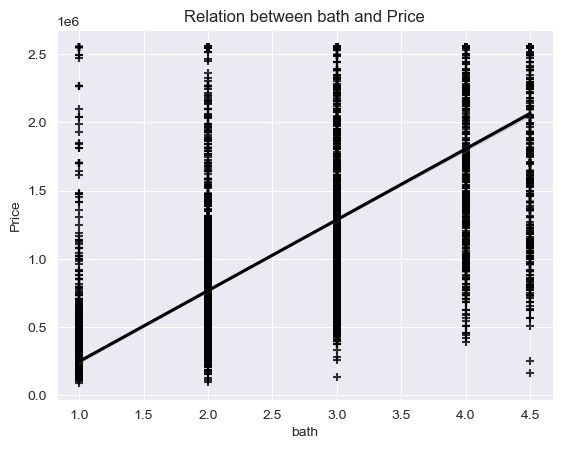

In [292]:
sns.regplot(x=new_df.bath, y=new_df['total_price'],color = 'black',marker='+')
plt.title('Relation between bath and Price')
plt.xlabel('bath')
plt.ylabel('Price')
plt.show()

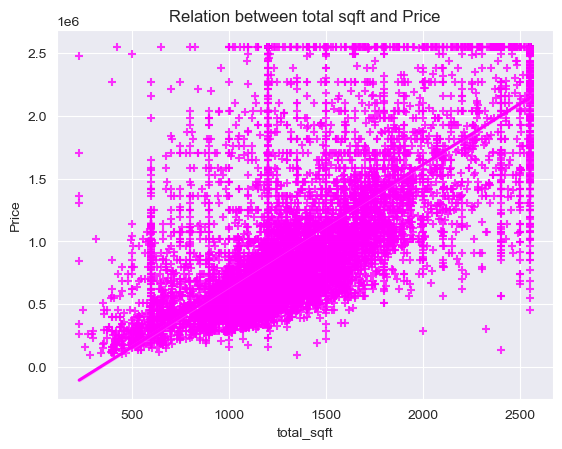

In [293]:
sns.regplot(x=new_df.total_sqft, y=new_df['total_price'],color = 'magenta',marker='+')
plt.title('Relation between total sqft and Price')
plt.xlabel('total_sqft')
plt.ylabel('Price')
plt.show()

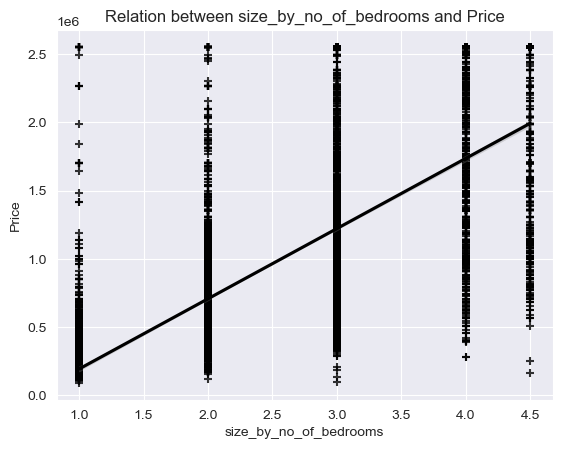

In [294]:
sns.regplot(x=new_df.size_by_no_of_bedrooms, y=new_df['total_price'],color = 'black',marker='+')
plt.title('Relation between size_by_no_of_bedrooms and Price')
plt.xlabel('size_by_no_of_bedrooms')
plt.ylabel('Price')
plt.show()


In [422]:
#linear regression
X = new_df[['size_by_no_of_bedrooms', 'total_sqft', 'bath']]  
y = new_df['total_price']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print('Coefficients: ',model.coef_)
print('Intercept: ',model.intercept_)

R²: 0.6584181800770788
Mean Squared Error: 155188076725.59674
Root Mean Squared Error: 393939.1789675111
Coefficients:  [ 62566.81863308    665.53585117 218402.52370119]
Intercept:  -618228.780933033


In [296]:
df3 = new_df.copy(deep=True)

In [424]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13319 entries, 0 to 13318
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                13319 non-null  int64  
 1   availability                      13319 non-null  object 
 2   total_sqft                        13319 non-null  float64
 3   bath                              13319 non-null  float64
 4   balcony                           13319 non-null  float64
 5   buying or not buying              13319 non-null  object 
 6   price-per-sqft-$                  13319 non-null  float64
 7   size_by_no_of_bedrooms            13319 non-null  float64
 8   total_price                       13319 non-null  float64
 9   location_DCC                      13319 non-null  bool   
 10  location_Dun Laoghaire            13319 non-null  bool   
 11  location_Fingal                   13319 non-null  bool   
 12  loca

In [298]:
df3 = pd.get_dummies(df3 , columns=['location','BER','Renovation needed','property_scope'])
df3.head()

,ID,availability,total_sqft,bath,balcony,buying or not buying,price-per-sqft-$,size_by_no_of_bedrooms,total_price,location_DCC,...,BER_E,BER_F,BER_G,Renovation needed_Maybe,Renovation needed_No,Renovation needed_Yes,property_scope_Constructed Space,property_scope_Extended Coverage,property_scope_Land Parcel,property_scope_Usable Interior
0,0,17-Oct,1056.0,2.0,1.0,No,419.93,2.0,443446.08,False,...,False,False,False,False,True,False,False,True,False,False
1,1,Ready To Move,2550.0,4.5,3.0,No,523.85,4.0,1362010.00,False,...,False,False,False,False,False,True,False,False,True,False
2,2,Ready To Move,1440.0,2.0,3.0,No,488.68,3.0,703699.20,False,...,False,False,True,False,False,True,True,False,False,False
3,3,Ready To Move,1521.0,3.0,1.0,No,708.91,3.0,1078252.11,False,...,False,False,True,False,False,True,False,True,False,False
4,4,Ready To Move,1200.0,2.0,1.0,No,482.38,2.0,578856.00,True,...,False,True,False,False,False,True,False,True,False,False


In [299]:
df3.columns

Index(['ID', 'availability', 'total_sqft', 'bath', 'balcony',
       'buying or not buying', 'price-per-sqft-$', 'size_by_no_of_bedrooms',
       'total_price', 'location_DCC', 'location_Dun Laoghaire',
       'location_Fingal', 'location_Other', 'location_South Dublin', 'BER_A',
       'BER_B', 'BER_C', 'BER_D', 'BER_E', 'BER_F', 'BER_G',
       'Renovation needed_Maybe', 'Renovation needed_No',
       'Renovation needed_Yes', 'property_scope_Constructed Space',
       'property_scope_Extended Coverage', 'property_scope_Land Parcel',
       'property_scope_Usable Interior'],
      dtype='object')

In [316]:
#df3.to_excel('dummycheck2.xlsx',index=False)

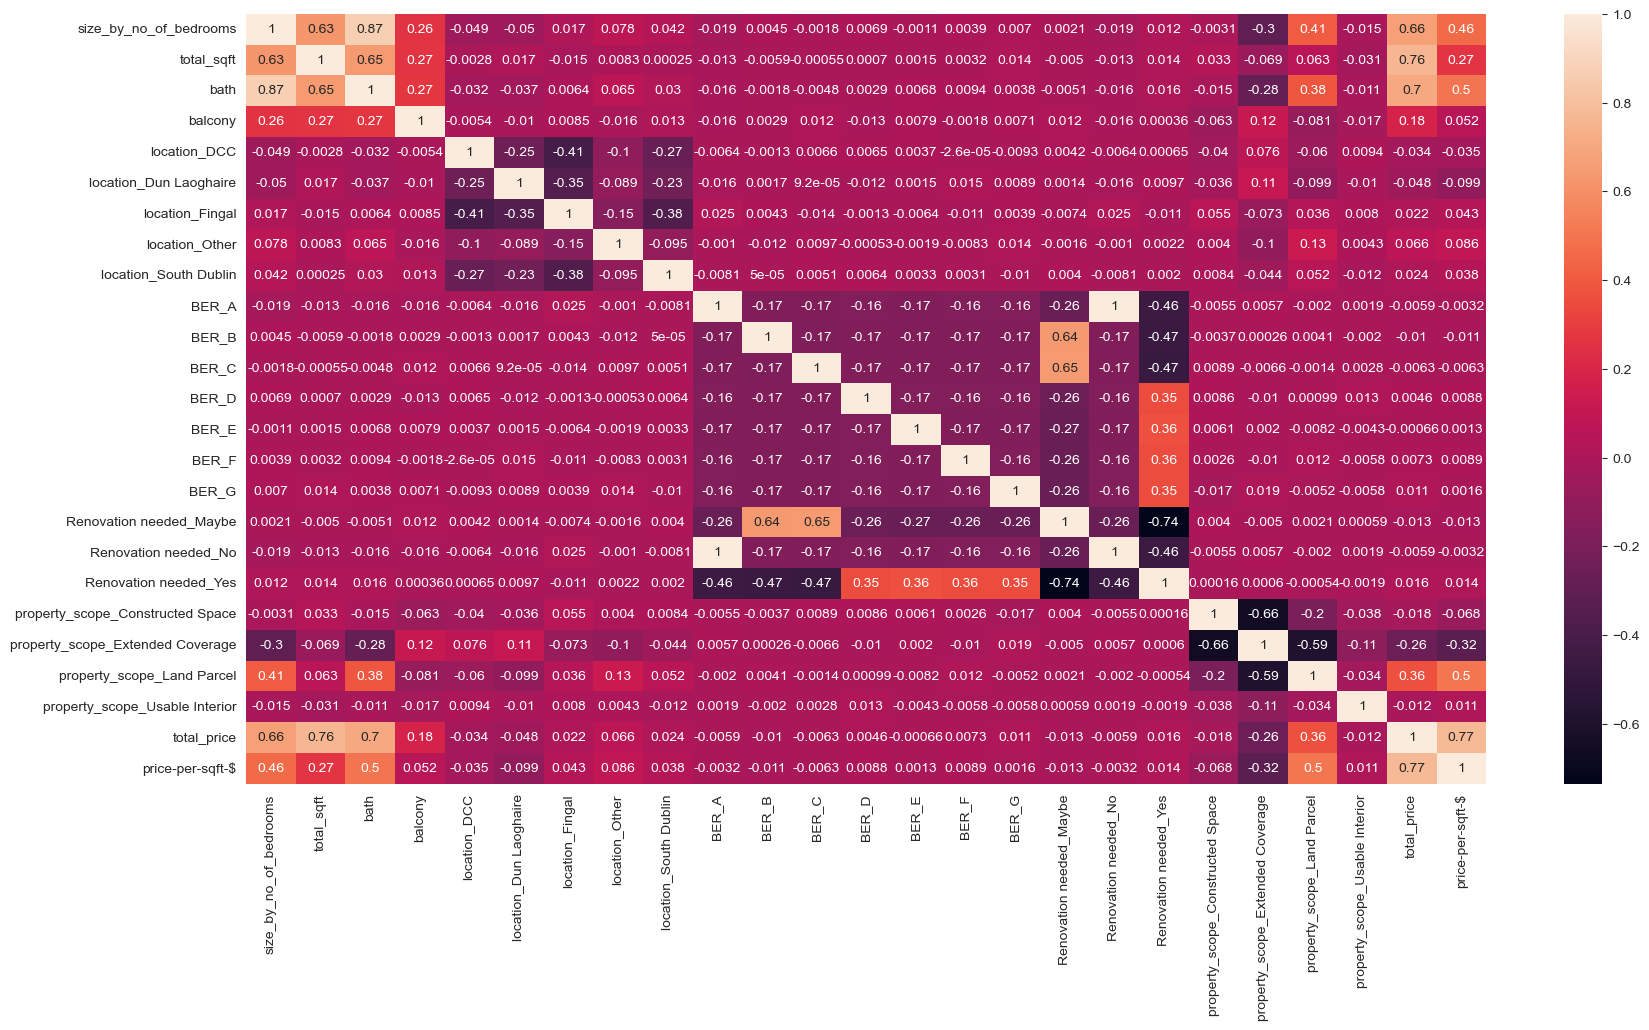

In [427]:
plt.figure(figsize=(20, 10))
sns.heatmap(df3[['size_by_no_of_bedrooms', 'total_sqft', 'bath','balcony','location_DCC', 'location_Dun Laoghaire', 'location_Fingal','location_Other', 'location_South Dublin', 'BER_A', 'BER_B', 'BER_C','BER_D', 'BER_E', 'BER_F', 'BER_G', 'Renovation needed_Maybe','Renovation needed_No', 'Renovation needed_Yes','property_scope_Constructed Space', 'property_scope_Extended Coverage','property_scope_Land Parcel', 'property_scope_Usable Interior','total_price','price-per-sqft-$']].corr(), annot=True)
plt.show()

Regression

In [472]:
X = df3[['size_by_no_of_bedrooms', 'total_sqft', 'bath','balcony','location_DCC', 'location_Dun Laoghaire', 'location_Fingal','location_Other', 'location_South Dublin', 'BER_A', 'BER_B', 'BER_C','BER_D', 'BER_E', 'BER_F', 'BER_G', 'Renovation needed_Maybe','Renovation needed_No', 'Renovation needed_Yes','property_scope_Constructed Space', 'property_scope_Extended Coverage','property_scope_Land Parcel', 'property_scope_Usable Interior']]
y = df3['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [325]:
y_train

9141      961.7200
1971      527.0300
2608      590.2000
8544     1210.6700
10451     844.8600
           ...    
11964    1094.4600
5191      573.8800
5390      405.4900
860      1336.6925
7270      864.4500
Name: price-per-sqft-$, Length: 10655, dtype: float64

Multiple Linear Regression

In [473]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training data
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred).round(2)
train_rmse = np.sqrt(train_mse).round(2)

# Predict and evaluate on test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred).round(2)
rmse = np.sqrt(mse).round(2)
# Round coefficients and intercept
coeff = np.array(model.coef_)
round_coeff = np.round(coeff, 2)
intercept = round(model.intercept_, 2)
r2 = r2_score(y_test, y_pred)
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training Root Mean Squared Error: {train_rmse}')

print(f'Testing Mean Squared Error: {mse}')
print(f'Testing Root Mean Squared Error: {rmse}')
print(f'R²: {r2}')
# Format and print coefficients
formatted_coeff = [f'{c:.2f}' for c in round_coeff]
print('formatted Coefficients:', formatted_coeff)
print('Normal Coefficients:',round_coeff)
print('Intercept:',intercept)

Training Mean Squared Error: 137358367908.62
Training Root Mean Squared Error: 370618.9
Testing Mean Squared Error: 136474230742.42
Testing Root Mean Squared Error: 369424.19
R²: 0.6996089062176831
formatted Coefficients: ['-12553.35', '784.27', '170841.57', '-12753.77', '-12368.29', '-44017.93', '16588.31', '33644.05', '6153.86', '5357.44', '-4545.48', '-1596.54', '3739.39', '-4020.21', '-6023.24', '7088.63', '-6142.01', '5357.44', '784.58', '-131945.05', '-147618.85', '308037.13', '-28473.23']
Normal Coefficients: [ -12553.35     784.27  170841.57  -12753.77  -12368.29  -44017.93
   16588.31   33644.05    6153.86    5357.44   -4545.48   -1596.54
    3739.39   -4020.21   -6023.24    7088.63   -6142.01    5357.44
     784.58 -131945.05 -147618.85  308037.13  -28473.23]
Intercept: -366727.28


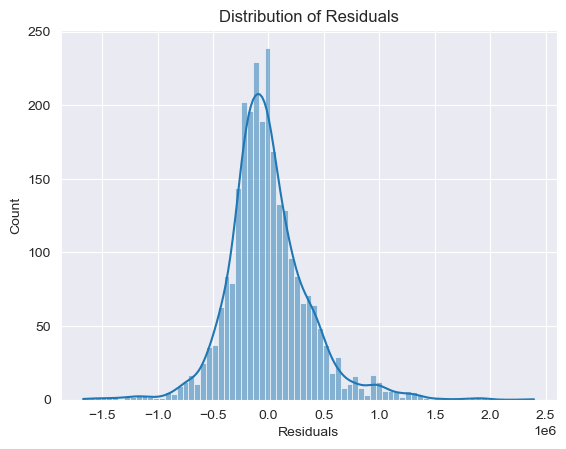

In [474]:
#Plotting

# Ensure y_test and y_pred are numeric
y_test = y_test.astype(float)
y_pred = y_pred.astype(float)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

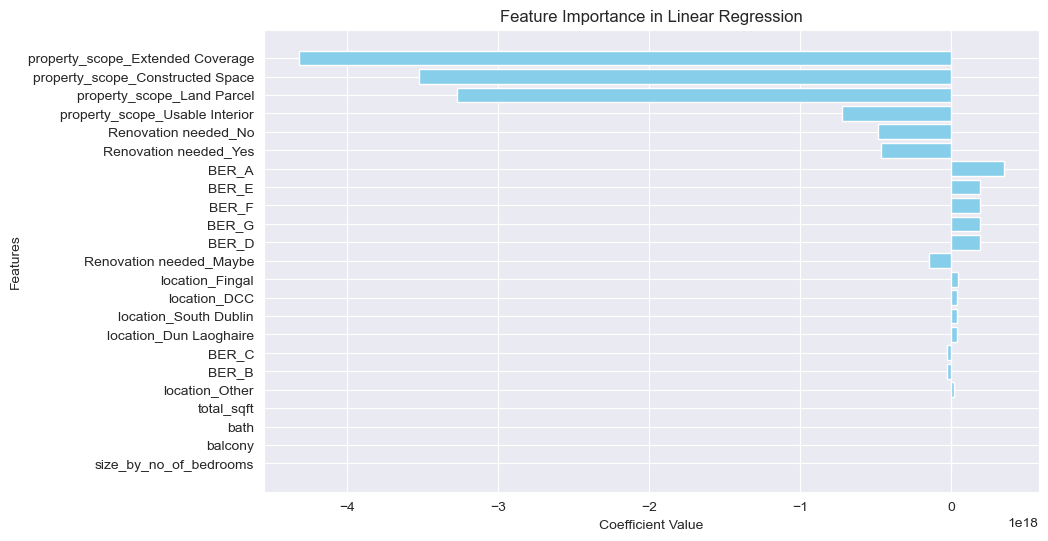

In [480]:
# Extract coefficients
coefficients = model.coef_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [433]:
print(X.dtypes)

size_by_no_of_bedrooms              float64
total_sqft                          float64
bath                                float64
balcony                             float64
location_DCC                           bool
location_Dun Laoghaire                 bool
location_Fingal                        bool
location_Other                         bool
location_South Dublin                  bool
BER_A                                  bool
BER_B                                  bool
BER_C                                  bool
BER_D                                  bool
BER_E                                  bool
BER_F                                  bool
BER_G                                  bool
Renovation needed_Maybe                bool
Renovation needed_No                   bool
Renovation needed_Yes                  bool
property_scope_Constructed Space       bool
property_scope_Extended Coverage       bool
property_scope_Land Parcel             bool
property_scope_Usable Interior  

In [476]:
#applying standardization to check if there is any difference
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [477]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on training data
y_train_pred = model.predict(X_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred).round(2)
train_rmse = np.sqrt(train_mse).round(2)

# Predict and evaluate on test
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred).round(2)
rmse = np.sqrt(mse).round(2)
coeff = np.array(model.coef_)
round_coeff = np.round(coeff,2)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Training Root Mean Squared Error: {train_rmse}')

print(f'Testing Mean Squared Error: {mse}')
print(f'Testing Root Mean Squared Error: {rmse}')
print('Coefficients:',round_coeff)
print('Intercept:',model.intercept_)

R²: 0.6994749410925141
Training Mean Squared Error: 137374302304.63
Training Root Mean Squared Error: 370640.39
Testing Mean Squared Error: 136535094022.93
Testing Root Mean Squared Error: 369506.55
Coefficients: [-7.52023000e+03  4.14979960e+05  1.56241880e+05 -1.11745800e+04
  4.13117846e+16  3.73780033e+16  4.75250368e+16  1.82726224e+16
  3.89756938e+16  3.48714400e+17 -2.71753642e+16 -2.72039697e+16
  1.89693703e+17  1.93115507e+17  1.90014606e+17  1.89747259e+17
 -1.43857122e+17 -4.85195477e+17 -4.66133574e+17 -3.52597258e+18
 -4.32112267e+18 -3.27072177e+18 -7.20238668e+17]
Intercept: 1064097.8554564943


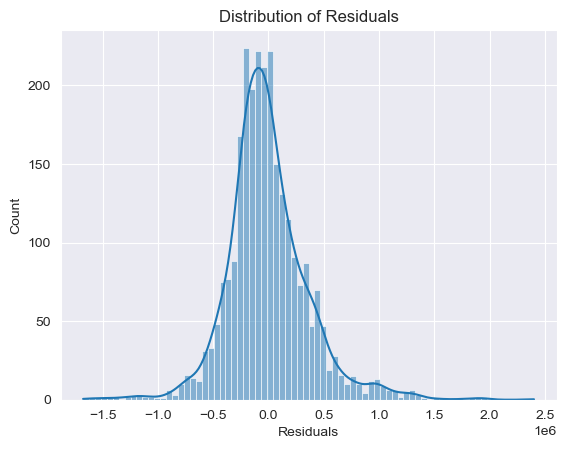

In [478]:
#Plotting

# Ensure y_test and y_pred are numeric
y_test = y_test.astype(float)
y_pred = y_pred.astype(float)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

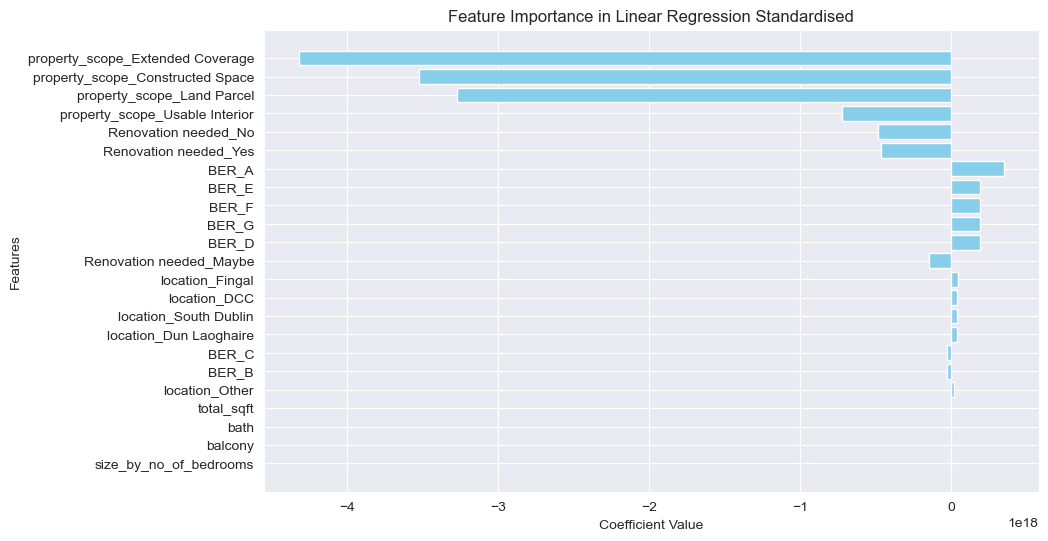

In [479]:
# Extract coefficients
coefficients = model.coef_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Linear Regression Standardised')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

Classification

In [440]:
X = df3[['size_by_no_of_bedrooms', 'total_sqft', 'bath','balcony','price-per-sqft-$','location_DCC', 'location_Dun Laoghaire', 'location_Fingal','location_Other', 'location_South Dublin', 'BER_A', 'BER_B', 'BER_C','BER_D', 'BER_E', 'BER_F', 'BER_G', 'Renovation needed_Maybe','Renovation needed_No', 'Renovation needed_Yes','property_scope_Constructed Space', 'property_scope_Extended Coverage','property_scope_Land Parcel', 'property_scope_Usable Interior']]
y = df3['buying or not buying']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Logistic Regression

In [342]:

# Create and train the logistic regression model
model = LogisticRegression(max_iter=2000)#class_weight='balanced'
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred , zero_division=0)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Cross-Validation Accuracy Scores: [0.75692163 0.74659784 0.74425153 0.75551384 0.74847489]
Mean Cross-Validation Accuracy: 0.7503519474425151
Coefficients: [[ 8.69417123e-02 -1.57287994e-04  2.59903218e-02 -4.63388014e-02
  -2.23763124e-05 -3.10976260e-01  5.90574985e-01 -3.65332038e-01
  -3.36888431e-01  6.48810948e-02  3.06277182e-01  2.09276395e-01
  -4.46034752e-01 -9.34396846e-02 -1.49270407e-01 -1.30607731e-01
  -5.39416526e-02 -2.36758358e-01  3.06277182e-01 -4.27259475e-01
   3.80083630e-06  6.07290471e-02 -4.65490778e-02 -3.71924420e-01]]
Intercept: [-0.39116115]
Accuracy: 0.753003003003003
Confusion Matrix:
[[1799   16]
 [ 642  207]]
Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.99      0.85      1815
         Yes       0.93      0.24      0.39       849

    accuracy                           0.75      2664
   macro avg       0.83      0.62      0.62      2664
weighted avg       0.80      0.75      0.70      2664

In [334]:
X_train.shape, y_train.shape

((10655, 24), (10655,))

In [335]:
y_train.value_counts()

buying or not buying
No     7241
Yes    3414
Name: count, dtype: int64

Oversampling to balance the classes using SMOTE

In [411]:
# Apply SMOTE to the training data. This is a form of oversampling to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.3, random_state=42, stratify=y_train_resampled)

In [336]:
y_train_resampled.value_counts()

buying or not buying
No     7241
Yes    7241
Name: count, dtype: int64

In [337]:
X_train_resampled.shape, y_train_resampled.shape

((14482, 24), (14482,))

In [412]:
#logistic regression after resampling
# Create and train the logistic regression model
model = LogisticRegression(max_iter=10000)#class_weight='balanced'
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test_resampled)
y_prob = model.predict_proba(X_test_resampled)[:, 1]
# Cross-validation
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred)
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
class_report = classification_report(y_test_resampled, y_pred , zero_division=0)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Cross-Validation Accuracy Scores: [0.80522682 0.79585799 0.80661075 0.7849038  0.7947706 ]
Mean Cross-Validation Accuracy: 0.7974739926183895
Coefficients: [[ 9.18090414e-02 -1.48004019e-04  3.86611275e-02 -3.24188094e-02
   6.98051631e-05  3.03399085e+00  3.91561241e+00  2.95094512e+00
   2.89880542e+00  3.36028119e+00  2.77980219e+00  2.64414068e+00
   2.08578059e+00  3.19083432e+00  3.05241021e+00  3.11366072e+00
   3.17572012e+00  2.18387415e+00  2.77980219e+00  1.21961521e+00
   2.49136768e+00  2.62359023e+00  2.52941556e+00  1.34381564e+00]]
Intercept: [-11.23861292]
Accuracy: 0.7972382048331416
Confusion Matrix:
[[2065  108]
 [ 773 1399]]
Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.95      0.82      2173
         Yes       0.93      0.64      0.76      2172

    accuracy                           0.80      4345
   macro avg       0.83      0.80      0.79      4345
weighted avg       0.83      0.80      0.79      43

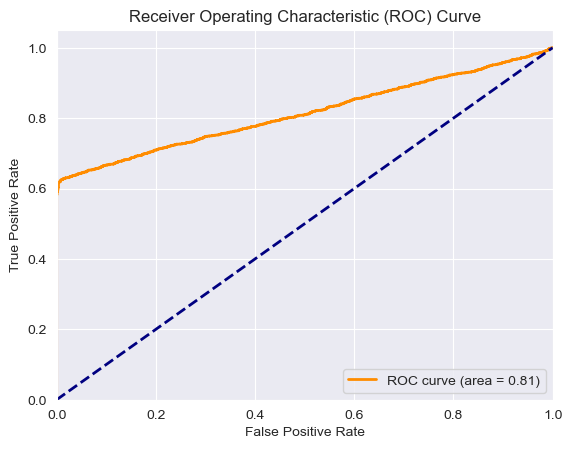

1769
2
2


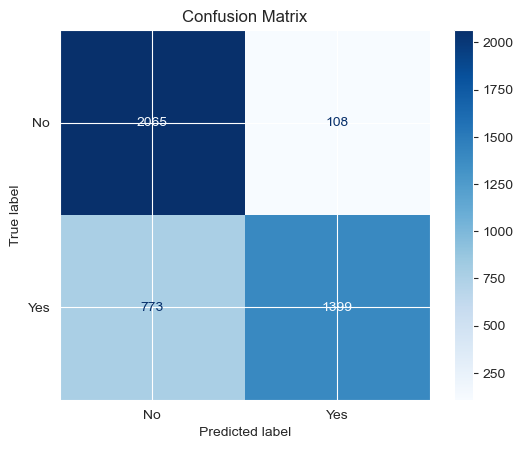

In [358]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_resampled, y_prob, pos_label='Yes')
roc_auc = roc_auc_score(y_test_resampled, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Check the length of label_encoder.classes_
print(len(label_encoder.classes_))
print(len(np.unique(y_test_resampled)))
print(len(np.unique(y_pred)))

# If there's a mismatch, use unique labels directly
unique_labels = np.unique(np.concatenate((y_test_resampled, y_pred)))

# Plot confusion matrix
cm = confusion_matrix(y_test_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

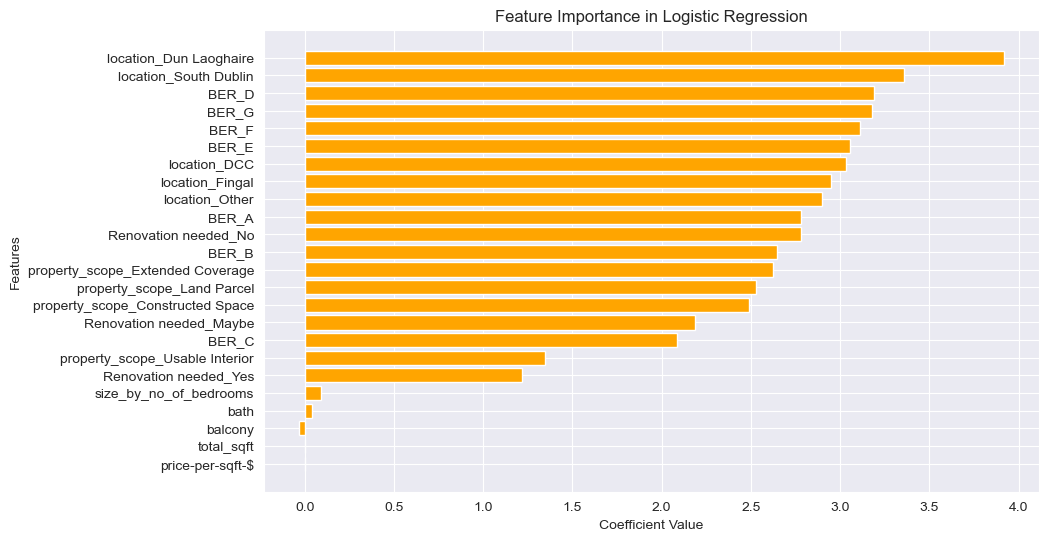

In [413]:
# Extract coefficients
coefficients = model.coef_[0]  # For binary classification, there's only one set of coefficients

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='orange')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

Decision Tree

In [386]:
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred_dt = dt_model.predict(X_test_resampled)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test_resampled, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test_resampled, y_pred_dt)
class_report_dt = classification_report(y_test_resampled, y_pred_dt)

print(f'Decision Tree Accuracy: {accuracy_dt}')
print('Decision Tree Confusion Matrix:')
print(conf_matrix_dt)
print('Decision Tree Classification Report:')
print(class_report_dt)

Decision Tree Accuracy: 0.72819332566168
Decision Tree Confusion Matrix:
[[1552  621]
 [ 560 1612]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.71      0.72      2173
         Yes       0.72      0.74      0.73      2172

    accuracy                           0.73      4345
   macro avg       0.73      0.73      0.73      4345
weighted avg       0.73      0.73      0.73      4345



In [392]:
# # Ensure feature names are strings
# feature_names = [str(col) for col in X.columns]
# 
# # Ensure class names are strings
# class_names = [str(cls) for cls in label_encoder.classes_]
# 
# # Plot the decision tree
# plt.figure(figsize=(20, 30))
# plot_tree(dt_model, filled=True, feature_names=feature_names, class_names=class_names)
# plt.title('Decision Tree')
# plt.show()

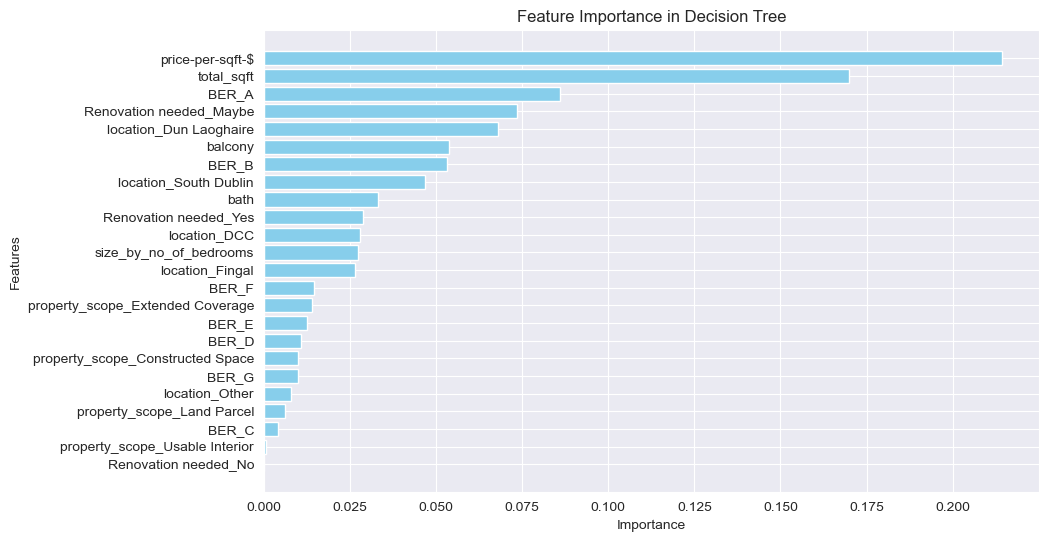

In [393]:
# Get feature importances from the trained Decision Tree model
feature_importances = dt_model.feature_importances_

# Define feature names
feature_names = X_train_resampled.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

Random Forest

In [395]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)
# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test_resampled)
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test_resampled, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_resampled, y_pred_rf)
class_report_rf = classification_report(y_test_resampled, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Confusion Matrix:')
print(conf_matrix_rf)
print('Random Forest Classification Report:')
print(class_report_rf)

Random Forest Accuracy: 0.7758342922899885
Random Forest Confusion Matrix:
[[1900  273]
 [ 701 1471]]
Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.87      0.80      2173
         Yes       0.84      0.68      0.75      2172

    accuracy                           0.78      4345
   macro avg       0.79      0.78      0.77      4345
weighted avg       0.79      0.78      0.77      4345



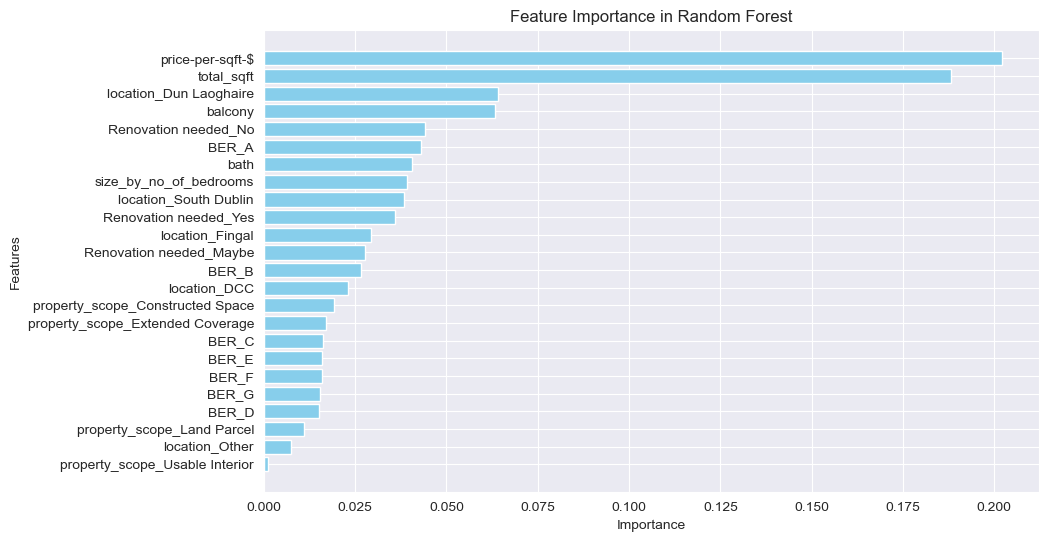

In [396]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Define feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

Hyper Parameter Tuning for Random Forest

In [363]:
#using randomized search
#Hyper Parameter Tuning for Random Forest to check for improvements in the result
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
random_param_grid = {
   'n_estimators': [500, 1000, 1500],
    'criterion': ['gini', 'entropy'],
   'max_depth': [10, 20, 30],
   'min_samples_split': [5,10,15],
   'min_samples_leaf': [1, 2, 4]#,
   #'class_weight': ['balanced', 'balanced_subsample']
}
random_grid_search_rf = RandomizedSearchCV(rf, random_param_grid, cv=5, scoring='accuracy',n_jobs=-1,random_state=42)
random_grid_search_rf.fit(X_train_resampled, y_train_resampled)

print('Best Score: ',random_grid_search_rf.best_score_)
print('Best Parameters: ',random_grid_search_rf.best_params_)

Best Score:  0.8128632786767203
Best Parameters:  {'n_estimators': 1500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'entropy'}


In [364]:
best_rf_model2 = random_grid_search_rf.best_estimator_
# Make predictions with the best model
y_pred_best_rf2 = best_rf_model2.predict(X_test_resampled)
# Evaluate the best Random Forest model
accuracy_best_rf2 = accuracy_score(y_test_resampled, y_pred_best_rf)
conf_matrix_best_rf2 = confusion_matrix(y_test_resampled, y_pred_best_rf)
class_report_best_rf2 = classification_report(y_test_resampled, y_pred_best_rf)

print(f'Best Random Forest Accuracy: {accuracy_best_rf2}')
print('Best Random Forest Confusion Matrix:')
print(conf_matrix_best_rf2)
print('Best Random Forest Classification Report:')
print(class_report_best_rf2)

Best Random Forest Accuracy: 0.8126582278481013
Best Random Forest Confusion Matrix:
[[2158   15]
 [ 799 1373]]
Best Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.99      0.84      2173
         Yes       0.99      0.63      0.77      2172

    accuracy                           0.81      4345
   macro avg       0.86      0.81      0.81      4345
weighted avg       0.86      0.81      0.81      4345



In [359]:
#using GridSearch CV updated the params as per result of random search
param_grid = {
   'n_estimators': [1500],
    'criterion': ['entropy'],
   'max_depth': [20,30],
   'min_samples_split': [10,15],
   'min_samples_leaf': [2, 4]#,
   #'class_weight': ['balanced', 'balanced_subsample']
}
grid_search_rf = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy',n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print('Best Score: ',grid_search_rf.best_score_)
print('Best Parameters: ',grid_search_rf.best_params_)

Best Score:  0.8148361517930034
Best Parameters:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 1500}


In [361]:
best_rf_model = grid_search_rf.best_estimator_
# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test_resampled)
# Evaluate the best Random Forest model
accuracy_best_rf = accuracy_score(y_test_resampled, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test_resampled, y_pred_best_rf)
class_report_best_rf = classification_report(y_test_resampled, y_pred_best_rf)

print(f'Best Random Forest Accuracy: {accuracy_best_rf}')
print('Best Random Forest Confusion Matrix:')
print(conf_matrix_best_rf)
print('Best Random Forest Classification Report:')
print(class_report_best_rf)

Best Random Forest Accuracy: 0.8126582278481013
Best Random Forest Confusion Matrix:
[[2158   15]
 [ 799 1373]]
Best Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.99      0.84      2173
         Yes       0.99      0.63      0.77      2172

    accuracy                           0.81      4345
   macro avg       0.86      0.81      0.81      4345
weighted avg       0.86      0.81      0.81      4345



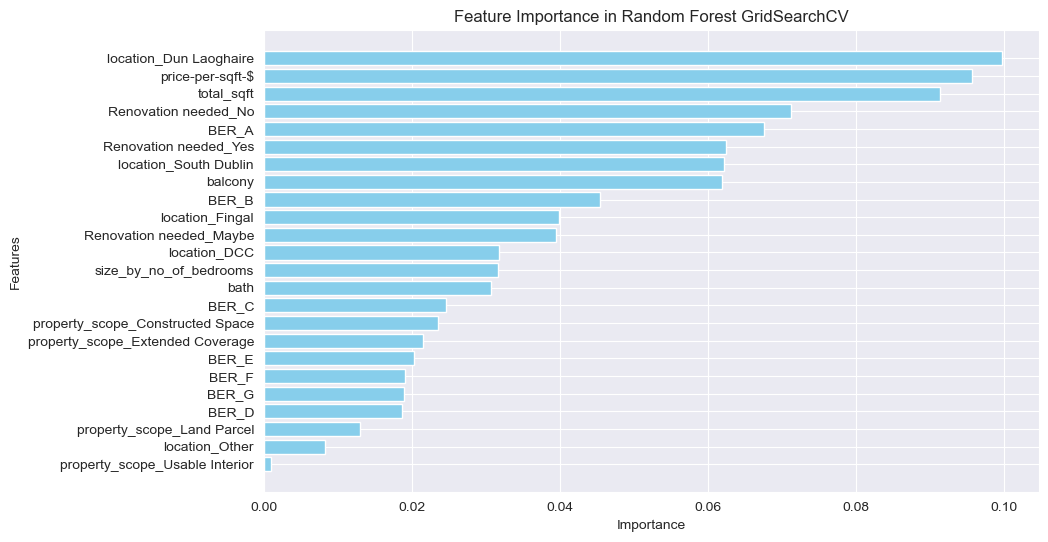

In [399]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Define feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest GridSearchCV')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [450]:
importance_df

,Feature,Coefficient
21,property_scope_Land Parcel,196.777680
2,bath,106.169158
20,property_scope_Extended Coverage,-94.584243
19,property_scope_Constructed Space,-92.583412
5,location_Dun Laoghaire,-32.228074
6,location_Fingal,12.497943
7,location_Other,11.417254
22,property_scope_Usable Interior,-9.610025
3,balcony,-7.518195
8,location_South Dublin,7.036558


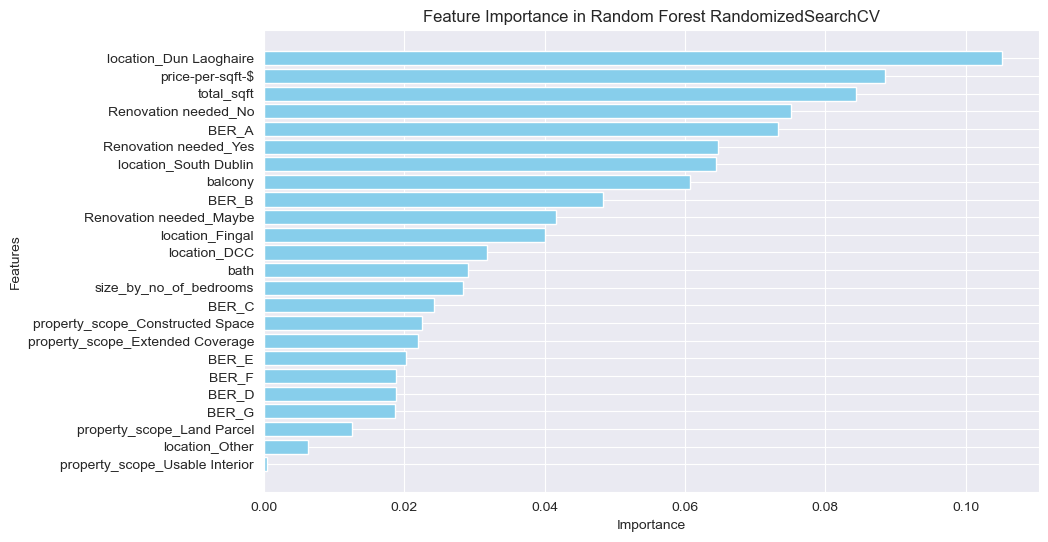

In [400]:
# Get feature importances
feature_importances = best_rf_model2.feature_importances_

# Define feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest RandomizedSearchCV')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

Accuracy: 0.6970720720720721
Confusion Matrix:
[[1560  255]
 [ 552  297]]
Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.86      0.79      1815
         Yes       0.54      0.35      0.42       849

    accuracy                           0.70      2664
   macro avg       0.64      0.60      0.61      2664
weighted avg       0.67      0.70      0.68      2664



Regression using Random Forest Regressor

In [451]:
df4 = df3.copy(deep=True)

In [453]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13319 entries, 0 to 13318
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                13319 non-null  int64  
 1   availability                      13319 non-null  object 
 2   total_sqft                        13319 non-null  float64
 3   bath                              13319 non-null  float64
 4   balcony                           13319 non-null  float64
 5   buying or not buying              13319 non-null  object 
 6   price-per-sqft-$                  13319 non-null  float64
 7   size_by_no_of_bedrooms            13319 non-null  float64
 8   total_price                       13319 non-null  float64
 9   location_DCC                      13319 non-null  bool   
 10  location_Dun Laoghaire            13319 non-null  bool   
 11  location_Fingal                   13319 non-null  bool   
 12  loca

In [455]:
df4 = df4.replace({True: 1, False: 0})

In [457]:
df4 = df4.drop(['ID', 'availability'], axis=1)

In [458]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13319 entries, 0 to 13318
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   total_sqft                        13319 non-null  float64
 1   bath                              13319 non-null  float64
 2   balcony                           13319 non-null  float64
 3   buying or not buying              13319 non-null  object 
 4   price-per-sqft-$                  13319 non-null  float64
 5   size_by_no_of_bedrooms            13319 non-null  float64
 6   total_price                       13319 non-null  float64
 7   location_DCC                      13319 non-null  int64  
 8   location_Dun Laoghaire            13319 non-null  int64  
 9   location_Fingal                   13319 non-null  int64  
 10  location_Other                    13319 non-null  int64  
 11  location_South Dublin             13319 non-null  int64  
 12  BER_

In [459]:
#df4.to_excel('df4.xlsx', index=False)

In [461]:
X = df4[['size_by_no_of_bedrooms', 'total_sqft', 'bath','balcony','location_DCC', 'location_Dun Laoghaire', 'location_Fingal','location_Other', 'location_South Dublin', 'BER_A', 'BER_B', 'BER_C','BER_D', 'BER_E', 'BER_F', 'BER_G', 'Renovation needed_Maybe','Renovation needed_No', 'Renovation needed_Yes','property_scope_Constructed Space', 'property_scope_Extended Coverage','property_scope_Land Parcel', 'property_scope_Usable Interior']]
y = df4['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [463]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"RMSE: {rmse}")

Mean Squared Error: 123694347221.4321
R^2 Score: 0.7277384891315847
RMSE: 351702.07167634385


In [467]:
#using GridSearch CV updated the params as per result of random search
param_grid_rfr = {
   'n_estimators': [1000 , 1500],
   'max_depth': [20,30],
   'min_samples_split': [10,15],
   'min_samples_leaf': [2, 4]#,
   #'class_weight': ['balanced', 'balanced_subsample']
}
rfr_cv = GridSearchCV(rf_regressor, param_grid_rfr, cv=3, scoring='neg_mean_absolute_percentage_error',n_jobs=-1)
rfr_cv.fit(X_train, y_train)

print('Best Score: ',rfr_cv.best_score_)
print('Best Parameters: ',rfr_cv.best_params_)

Best Score:  -0.2572898973723547
Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 1500}


In [482]:
y_pred = rfr_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"RMSE: {rmse}")

Mean Squared Error: 111945945750.22166
R^2 Score: 0.7535976945576371
RMSE: 334583.2418849182


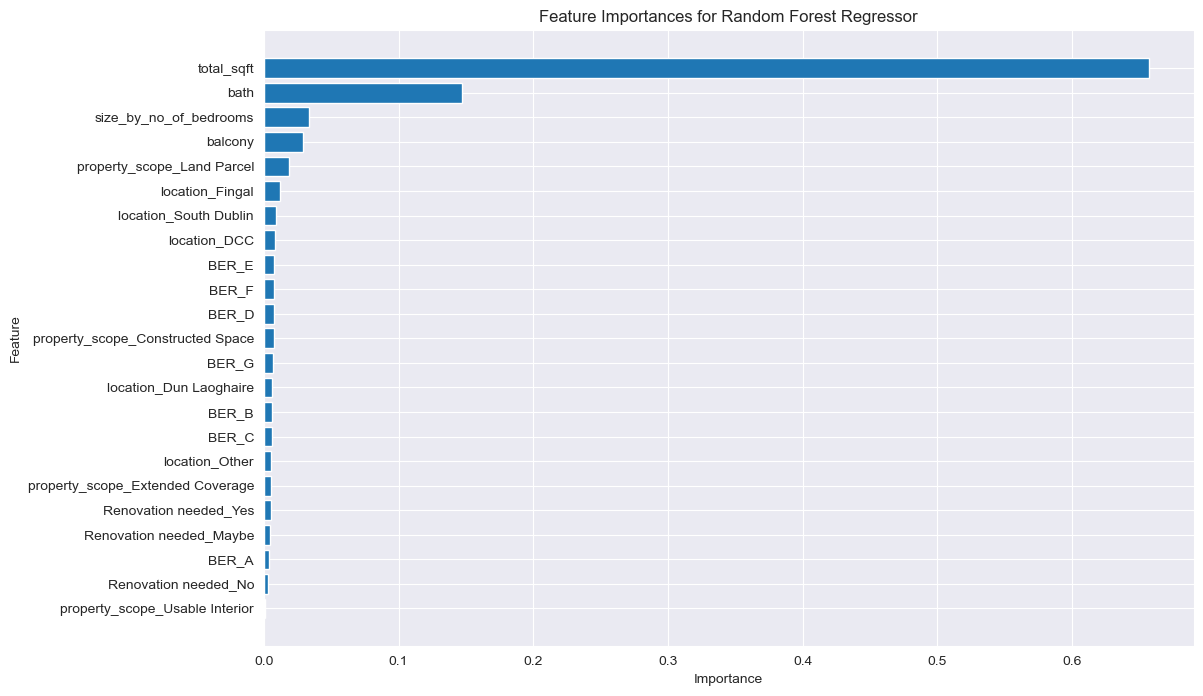

In [470]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()

In [481]:
feature_importances_df

,Feature,Importance
1,total_sqft,0.657389
2,bath,0.146903
0,size_by_no_of_bedrooms,0.033925
3,balcony,0.029082
21,property_scope_Land Parcel,0.019028
6,location_Fingal,0.011902
8,location_South Dublin,0.009197
4,location_DCC,0.008687
13,BER_E,0.007943
14,BER_F,0.007770


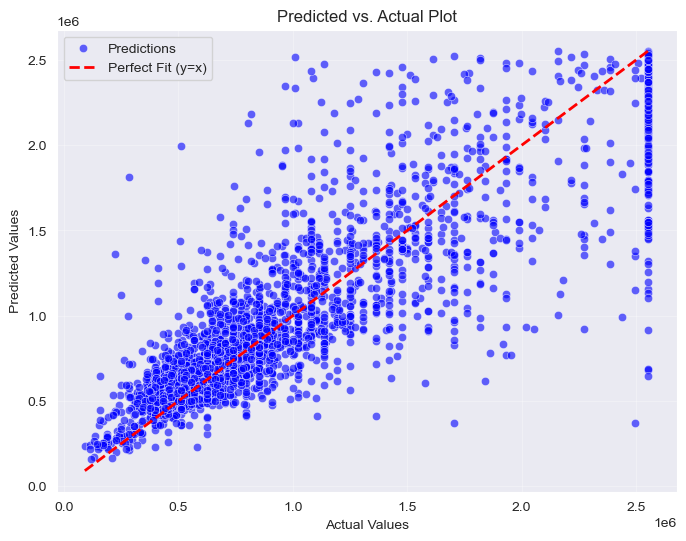

In [483]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Plot')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [310]:
'''
# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print('Gradient Boosting Confusion Matrix:')
print(conf_matrix_gb)
print('Gradient Boosting Classification Report:')
print(class_report_gb)
'''

"\n# Create and train the Gradient Boosting model\ngb_model = GradientBoostingClassifier(random_state=42)\ngb_model.fit(X_train_resampled, y_train_resampled)\n\n# Make predictions on the testing data\ny_pred_gb = gb_model.predict(X_test)\n\n# Evaluate the Gradient Boosting model\naccuracy_gb = accuracy_score(y_test, y_pred_gb)\nconf_matrix_gb = confusion_matrix(y_test, y_pred_gb)\nclass_report_gb = classification_report(y_test, y_pred_gb)\n\nprint(f'Gradient Boosting Accuracy: {accuracy_gb}')\nprint('Gradient Boosting Confusion Matrix:')\nprint(conf_matrix_gb)\nprint('Gradient Boosting Classification Report:')\nprint(class_report_gb)\n"